## Life Expectancy and GDP analysis of six countries

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

df = pd.read_csv("all_data.csv")
# inspect the columns 
df.rename(columns={"Life expectancy at birth (years)":"LifeExpectancy"},inplace=True)
print(df.head())

  Country  Year  LifeExpectancy           GDP
0   Chile  2000            77.3  7.786093e+10
1   Chile  2001            77.3  7.097992e+10
2   Chile  2002            77.8  6.973681e+10
3   Chile  2003            77.9  7.564346e+10
4   Chile  2004            78.0  9.921039e+10


In [147]:
class ScalarFormatterForceFormat(ScalarFormatter):
    def _set_format(self): 
        self.format = "%.2f" 

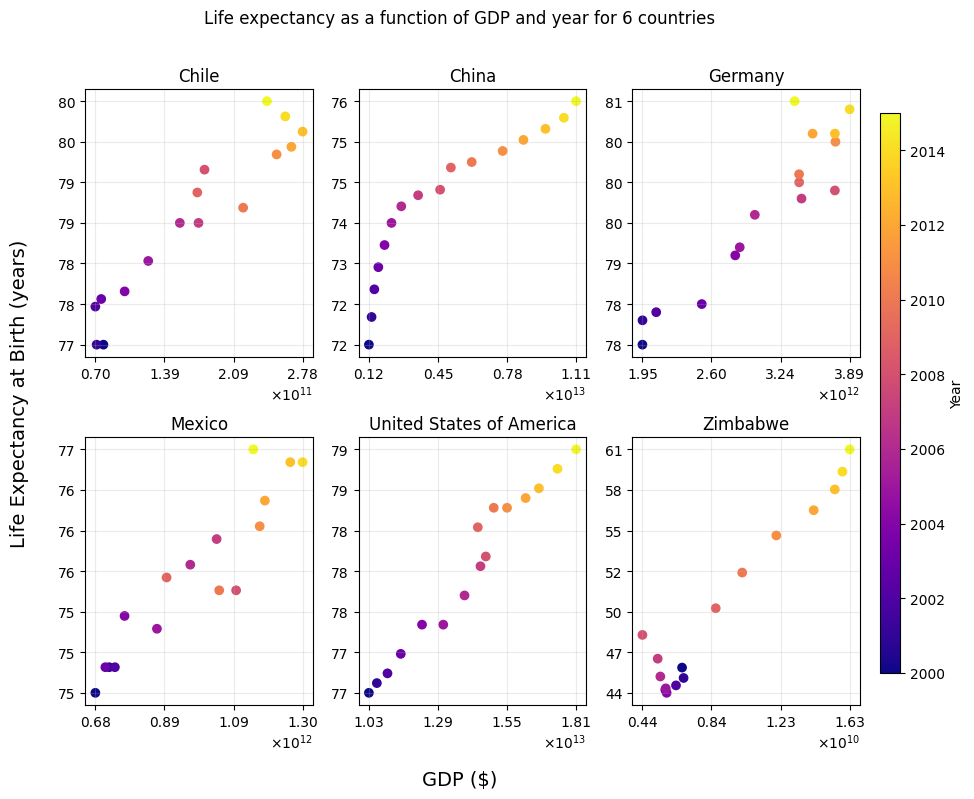

In [148]:
# x = GDP, y = life expectancy, z = year
countries = df.Country.unique()
fig, axs = plt.subplots(nrows=2, 
                        ncols=3, 
                        figsize=(10,8), 
                        gridspec_kw={"hspace":0.3} # add more vertical space between subplots 
                        )
country_idx = 0 


scatter_plots = []
for i in range(2):
  for j in range(3):
    country = countries[country_idx]
    
    # get variables 
    yr = df.Year[df.Country == country]
    x = df.GDP[df.Country == country]
    y = df.LifeExpectancy[df.Country == country]
    
    # plot 
    ax = axs[i, j]
    ax.grid('both', alpha=0.25)
    scatter_plot = ax.scatter(x, y, c=yr, cmap='plasma')
    ax.set_title(country)
    
    # format y ticks (7 per plot)
    yticks = np.linspace(start=np.min(y), stop=np.max(y), num=7)
    ax.set_yticks(yticks)
    ax.set_yticklabels([f"{round(ytick):d}" for ytick in yticks])
    
    # format x ticks (4 per plot)
    xticks = np.linspace(start=np.min(x), stop=np.max(x), num=4)
    ax.set_xticks(xticks)
    x_formatter = ScalarFormatterForceFormat(useOffset=False, useMathText=True)
    ax.xaxis.set_major_formatter(x_formatter)

    # required to generate the colorbar 
    scatter_plots.append(scatter_plot) 
    
    # update country index 
    country_idx += 1

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) # [0.92, 0.15, 0.02, 0.7] -> [x, y, width, height]
cbar = fig.colorbar(scatter_plots[0], cax = cbar_ax)
cbar.set_label('Year')

# Add axis labels for the entire figure
fig.text(0.5, 0.01, 'GDP ($)', ha='center', fontsize=14)
fig.text(0.05, 0.5, 'Life Expectancy at Birth (years)', va='center', rotation='vertical', fontsize=14)
fig.suptitle("Life expectancy as a function of GDP and year for 6 countries")
fig.savefig("country_plot.png", format="png")
plt.show()


### Observations
- GDP increases over the years have resulted in increased life expectancy at birth for all countries analyzed. 
- The only exception to this pattern happened for Zimbabwe in the beginning of the 2000s, which managed to slightly increase its life expectancy while there was a decrease in GDP (bottom left of the graph).
- The country which exhibited the most consistent increase in GDP and life expectancy over the years was China (S-shaped curve), followed by the USA (more linear pattern). 
- In the recent years, Chile, Germany and Mexico managed to increase their life expectancy slightly despite their GDP lowering. This suggests the presence of other important factors that affect life expectancy and that aren't uniquely captured by the country's GDP, such as changes in health care policies that enable better access to health care. 